Machine Learning pipeline with Lead 1 and Lead 2 features

In [564]:
import numpy as np
import pandas as pd
import random
import os

SEED = 1234
np.random.seed(SEED)
pd.core.common._random_stat = SEED
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

In [565]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [566]:
! unzip /content/MyDrive/MyDrive/AppliedAIinBiomedicine/final-assignment/features_l1_l2.zip

Archive:  /content/MyDrive/MyDrive/AppliedAIinBiomedicine/final-assignment/features_l1_l2.zip
replace features_l1_l2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [567]:
features = pd.read_csv('/content/features_l1_l2.csv', index_col=0)
features.describe()

,rr_intervals,drr_intervals,rr_intervals_minus_1,rr_intervals_plus_1,drr_intervals_minus_1,drr_intervals_plus_1,rr_mean_2_min_window_centered,rr_std_2_min_window_centered,drr_mean_2_min_window_centered,drr_std_2_min_window_centered,rmssd_2_min_window_centered,rr_std_5_min_window_centered,drr_mean_5_min_window_centered,drr_std_5_min_window_centered,rmssd_5_min_window_centered,rr_mean_2_min_before,rr_std_2_min_window_before,drr_mean_2_min_window_before,drr_std_2_min_window_before,rmssd_2_min_window_before,rr_mean_5_min_window_before,rr_std_5_min_window_before,drr_mean_5_min_window_before,drr_std_5_min_before,rmssd_5_min_window_before,max_corrs_win_4,lag_max_corrs_win_4,max_corrs_win_20,lag_max_corrs_win_20,max_corrs_win_20_l2,lag_max_corrs_win_20_l2,PR_interval_l1,PR_interval_l2,QR_interval_l1,QR_interval_l2
count,1714.000000,1713.000000,1714.000000,1713.00000,1713.000000,1712.000000,198660.000000,198660.000000,198660.000000,198660.000000,198660.000000,177336.000000,1.773360e+05,177336.000000,177336.000000,198606.000000,198606.000000,198606.000000,198606.000000,198606.000000,177057.000000,177057.000000,177057.000000,177057.000000,177057.000000,212572.000000,212572.000000,210412.000000,210412.000000,210412.000000,210412.000000,210965.000000,211098.000000,188303.000000,190998.000000
mean,1.049580,-0.000255,1.049580,1.04948,-0.000255,-0.000208,0.760666,0.073845,-0.000107,0.109588,0.767652,0.078118,7.191758e-07,0.113666,0.768120,0.761432,0.070658,-0.000040,0.106476,0.768217,0.762474,0.075353,-0.000056,0.111004,0.769687,13.091457,25.461679,13.026445,25.477563,7.830897,25.319321,0.148584,0.153303,0.275726,0.262528
std,0.062507,0.028682,0.062507,0.06239,0.028682,0.028625,0.171898,0.084254,0.007310,0.136120,0.177266,0.084124,4.608158e-03,0.134700,0.176273,0.173337,0.086768,0.010087,0.140399,0.179409,0.172161,0.086093,0.006523,0.137910,0.177985,16.909313,41.834657,16.481153,41.710051,10.536180,41.954080,0.202605,0.203089,0.093774,0.096205
min,0.628000,-0.432000,0.628000,0.62800,-0.432000,-0.432000,0.250355,0.001949,-0.524858,0.002853,0.253028,0.002943,-3.382353e-01,0.003906,0.256250,0.247732,0.001627,-0.776042,0.002356,0.249870,0.249681,0.001838,-0.481771,0.002680,0.252104,0.000684,-74.000000,0.013689,-74.000000,0.016572,-74.000000,-12.312500,-12.242188,0.068000,0.068000
25%,1.024000,-0.012000,1.024000,1.02400,-0.012000,-0.012000,0.638951,0.017584,-0.001420,0.017138,0.642764,0.022462,-9.411765e-04,0.019208,0.643723,0.638158,0.014976,-0.001867,0.015735,0.641988,0.638861,0.018873,-0.001290,0.017831,0.642741,2.244225,-3.000000,2.242081,-3.000000,1.666505,-4.000000,0.164062,0.168000,0.209469,0.179688
50%,1.056000,0.000000,1.056000,1.05600,0.000000,0.000000,0.750930,0.051774,0.000000,0.065859,0.756529,0.059113,0.000000e+00,0.079369,0.757539,0.750434,0.043033,0.000000,0.047903,0.755585,0.751143,0.053749,0.000000,0.070088,0.756636,8.414843,6.000000,8.352982,6.000000,4.296690,6.000000,0.192000,0.196000,0.304000,0.281250
75%,1.088000,0.012000,1.088000,1.08800,0.012000,0.012000,0.885530,0.105996,0.001385,0.162664,0.892802,0.107148,9.302326e-04,0.163920,0.894389,0.887000,0.103386,0.001778,0.160519,0.893895,0.888822,0.106792,0.001250,0.163160,0.896354,17.817314,66.000000,17.720483,66.000000,9.013688,66.000000,0.224000,0.226562,0.343750,0.336000
max,1.224000,0.596000,1.224000,1.22400,0.596000,0.596000,2.540865,2.988946,0.551711,4.258109,3.748766,2.338192,3.314732e-01,3.201504,2.889515,3.195312,3.832755,0.896034,5.801520,4.989993,2.479911,2.917631,0.551711,4.103275,3.617711,652.306495,268.000000,452.248197,232.000000,134.887804,224.000000,0.695312,0.687500,0.609375,0.664062


In [568]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(features, test_size=0.25, random_state=SEED, shuffle=True, stratify=features['target'])

train_target = train.target
train_features = train.drop(columns='target')

test_target = test.target
test_features = test.drop(columns='target')

In [569]:
train_features.describe()

,rr_intervals,drr_intervals,rr_intervals_minus_1,rr_intervals_plus_1,drr_intervals_minus_1,drr_intervals_plus_1,rr_mean_2_min_window_centered,rr_std_2_min_window_centered,drr_mean_2_min_window_centered,drr_std_2_min_window_centered,rmssd_2_min_window_centered,rr_std_5_min_window_centered,drr_mean_5_min_window_centered,drr_std_5_min_window_centered,rmssd_5_min_window_centered,rr_mean_2_min_before,rr_std_2_min_window_before,drr_mean_2_min_window_before,drr_std_2_min_window_before,rmssd_2_min_window_before,rr_mean_5_min_window_before,rr_std_5_min_window_before,drr_mean_5_min_window_before,drr_std_5_min_before,rmssd_5_min_window_before,max_corrs_win_4,lag_max_corrs_win_4,max_corrs_win_20,lag_max_corrs_win_20,max_corrs_win_20_l2,lag_max_corrs_win_20_l2,PR_interval_l1,PR_interval_l2,QR_interval_l1,QR_interval_l2
count,1305.000000,1.304000e+03,1305.000000,1304.000000,1304.000000,1303.000000,149061.000000,149061.000000,149061.000000,149061.000000,149061.000000,132958.000000,132958.000000,132958.000000,132958.000000,148929.000000,148929.000000,148929.000000,148929.000000,148929.000000,132818.000000,132818.000000,132818.000000,132818.000000,132818.000000,159421.000000,159421.000000,157796.000000,157796.000000,157796.000000,157796.000000,158229.000000,158313.000000,141231.000000,143308.000000
mean,1.049891,-2.116564e-04,1.049910,1.049883,-0.000353,0.000166,0.760622,0.073855,-0.000106,0.109594,0.767636,0.078115,0.000004,0.113688,0.768009,0.761288,0.070618,-0.000050,0.106416,0.768081,0.762366,0.075323,-0.000074,0.110964,0.769588,13.107848,25.462223,13.037825,25.466666,7.841045,25.321155,0.149006,0.153731,0.275745,0.262709
std,0.061672,3.036809e-02,0.060704,0.061810,0.025411,0.030382,0.171967,0.084889,0.007334,0.136768,0.177519,0.084623,0.004661,0.135352,0.176563,0.173551,0.087532,0.009701,0.141569,0.179943,0.172342,0.086562,0.006413,0.138513,0.178336,17.049378,41.844666,16.537492,41.714728,10.562344,41.965731,0.202234,0.202732,0.093845,0.096177
min,0.628000,-4.320000e-01,0.756000,0.628000,-0.432000,-0.432000,0.250533,0.001949,-0.524858,0.002853,0.253190,0.002943,-0.338235,0.003906,0.256250,0.247732,0.001627,-0.776042,0.002356,0.249870,0.249681,0.001838,-0.481771,0.002680,0.252104,0.000684,-72.000000,0.016698,-74.000000,0.034680,-74.000000,-12.312500,-12.242188,0.068000,0.068000
25%,1.024000,-1.200000e-02,1.024000,1.024000,-0.012000,-0.012000,0.638672,0.017573,-0.001400,0.017106,0.642635,0.022398,-0.000930,0.019168,0.643551,0.637895,0.014951,-0.001867,0.015692,0.641870,0.638710,0.018819,-0.001290,0.017811,0.642586,2.250181,-3.000000,2.246243,-3.000000,1.669178,-4.000000,0.164062,0.168000,0.208000,0.179688
50%,1.056000,2.842171e-14,1.056000,1.056000,0.000000,0.000000,0.750901,0.051696,0.000000,0.065771,0.756500,0.059087,0.000000,0.079352,0.757476,0.750434,0.042826,0.000000,0.047667,0.755455,0.751143,0.053692,0.000000,0.069993,0.756482,8.427759,6.000000,8.367355,6.000000,4.293718,6.000000,0.192000,0.196000,0.304000,0.281250
75%,1.088000,1.200000e-02,1.088000,1.088000,0.012000,0.012000,0.885417,0.105897,0.001395,0.162626,0.892622,0.107139,0.000941,0.163994,0.894264,0.886719,0.103364,0.001778,0.160661,0.893580,0.888522,0.106825,0.001241,0.163297,0.895968,17.834752,66.000000,17.742852,66.000000,9.000441,66.000000,0.224000,0.226562,0.343750,0.336000
max,1.220000,5.960000e-01,1.224000,1.224000,0.104000,0.596000,2.540865,2.944563,0.255729,4.103390,3.626088,2.294856,0.331473,3.134095,2.834308,3.195312,3.832755,0.304688,5.801520,4.989993,2.479911,2.917631,0.279297,4.103275,3.617711,652.306495,268.000000,452.248197,232.000000,130.224877,224.000000,0.687500,0.687500,0.568000,0.664062


In [570]:
#replace nan values with the mean
for key in train_features.keys():
  #train_features[key] = train_features[key].fillna(train_features[key].mean())
  train_features[key] = train_features[key].fillna(-1)

In [571]:
train_features.describe()

,rr_intervals,drr_intervals,rr_intervals_minus_1,rr_intervals_plus_1,drr_intervals_minus_1,drr_intervals_plus_1,rr_mean_2_min_window_centered,rr_std_2_min_window_centered,drr_mean_2_min_window_centered,drr_std_2_min_window_centered,rmssd_2_min_window_centered,rr_std_5_min_window_centered,drr_mean_5_min_window_centered,drr_std_5_min_window_centered,rmssd_5_min_window_centered,rr_mean_2_min_before,rr_std_2_min_window_before,drr_mean_2_min_window_before,drr_std_2_min_window_before,rmssd_2_min_window_before,rr_mean_5_min_window_before,rr_std_5_min_window_before,drr_mean_5_min_window_before,drr_std_5_min_before,rmssd_5_min_window_before,max_corrs_win_4,lag_max_corrs_win_4,max_corrs_win_20,lag_max_corrs_win_20,max_corrs_win_20_l2,lag_max_corrs_win_20_l2,PR_interval_l1,PR_interval_l2,QR_interval_l1,QR_interval_l2
count,159768.000000,159768.000000,159768.000000,159768.000000,159768.000000,159768.000000,159768.000000,159768.000000,1.597680e+05,159768.000000,159768.000000,159768.000000,159768.000000,159768.000000,159768.000000,159768.000000,159768.000000,1.597680e+05,159768.000000,159768.000000,159768.000000,159768.000000,159768.000000,159768.000000,159768.000000,159768.000000,159768.000000,159768.000000,159768.00000,159768.000000,159768.000000,159768.000000,159768.000000,159768.000000,159768.000000
mean,-0.983256,-0.991840,-0.983256,-0.983269,-0.991841,-0.991843,0.642632,0.001889,-6.711457e-02,0.035234,0.649176,-0.102799,-0.167803,-0.073195,0.471327,0.641798,-0.002015,-6.788913e-02,0.031354,0.648131,0.465086,-0.106065,-0.168744,-0.076436,0.471090,13.077207,25.404749,12.864558,25.13999,7.731921,24.996276,0.137938,0.143224,0.127727,0.132619
std,0.184591,0.089996,0.184590,0.184520,0.089971,0.089996,0.470537,0.280758,2.501242e-01,0.307299,0.474092,0.410215,0.373721,0.434110,0.680046,0.473556,0.282186,2.516373e-01,0.309996,0.477365,0.678406,0.410340,0.374490,0.434771,0.682319,17.043512,41.817349,16.508036,41.55935,10.542247,41.807066,0.230433,0.229648,0.417983,0.394513
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-72.000000,-1.000000,-74.00000,-1.000000,-74.000000,-12.312500,-12.242188,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.611328,0.014624,-2.103365e-03,0.014480,0.615770,0.012453,-0.003333,0.011447,0.564730,0.609600,0.012789,-2.823529e-03,0.013504,0.614484,0.558475,0.010823,-0.004645,0.010894,0.566838,2.225238,-3.000000,2.098277,-3.00000,1.610306,-3.000000,0.164000,0.164062,0.140625,0.140625
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.736056,0.043990,-2.186285e-15,0.046638,0.741673,0.041208,-0.000217,0.038896,0.707890,0.735556,0.035062,-2.583792e-15,0.034760,0.740941,0.700162,0.034692,-0.000313,0.031500,0.707696,8.408352,6.000000,8.250611,6.00000,4.212393,6.000000,0.192000,0.195312,0.289062,0.265625
75%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.873047,0.100813,1.201923e-03,0.155276,0.881557,0.095787,0.000651,0.145030,0.860955,0.874081,0.098310,1.562500e-03,0.152705,0.881848,0.853877,0.094278,0.000837,0.143900,0.861979,17.810186,66.000000,17.564755,65.00000,8.920201,65.000000,0.224000,0.226562,0.336000,0.328125
max,1.220000,0.596000,1.224000,1.224000,0.104000,0.596000,2.540865,2.944563,2.557292e-01,4.103390,3.626088,2.294856,0.331473,3.134095,2.834308,3.195312,3.832755,3.046875e-01,5.801520,4.989993,2.479911,2.917631,0.279297,4.103275,3.617711,652.306495,268.000000,452.248197,232.00000,130.224877,224.000000,0.687500,0.687500,0.568000,0.664062


In [572]:
#replace nan values with the mean
for key in train_features.keys():
  #train_features[key] = train_features[key].fillna(train_features[key].mean())
  test_features[key] = test_features[key].fillna(-1)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


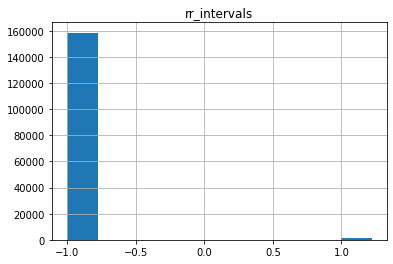

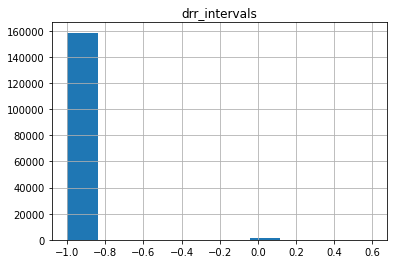

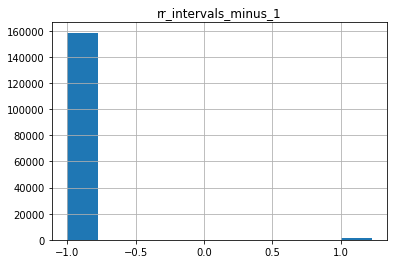

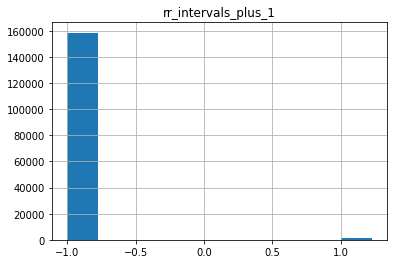

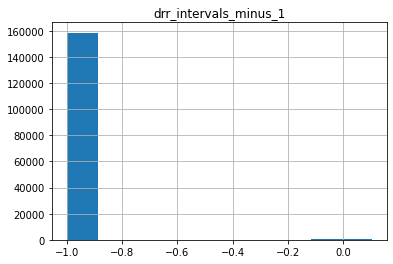

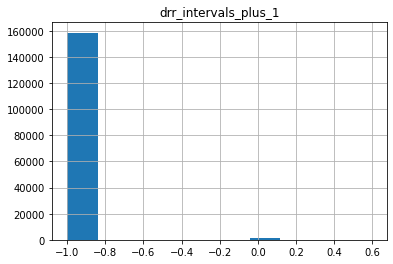

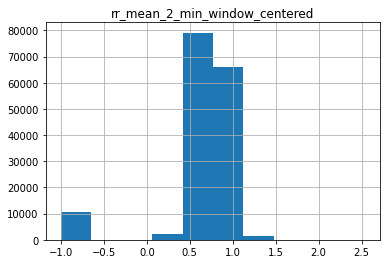

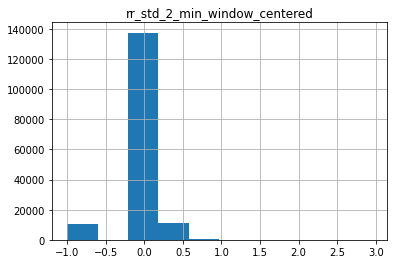

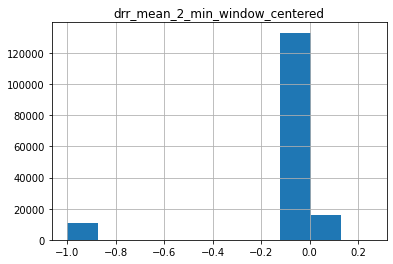

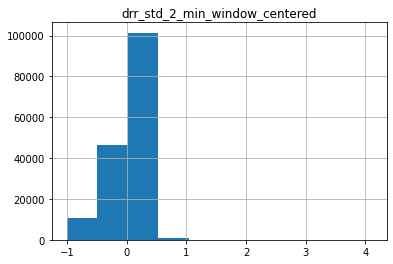

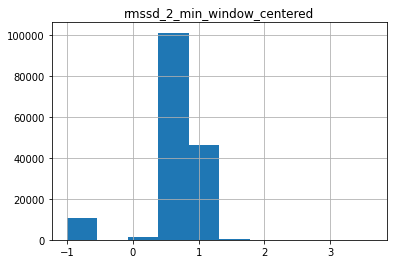

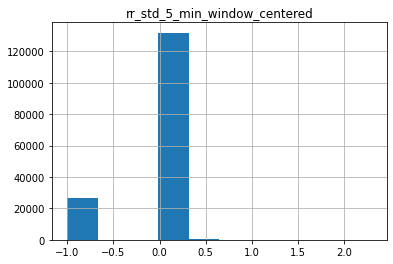

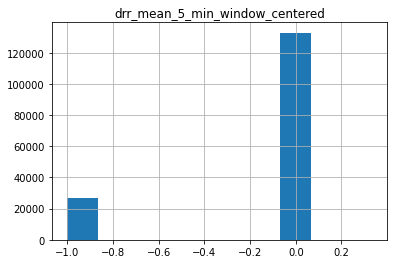

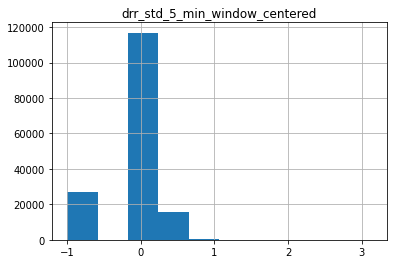

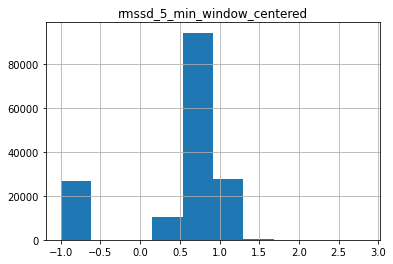

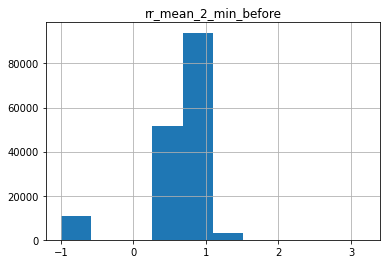

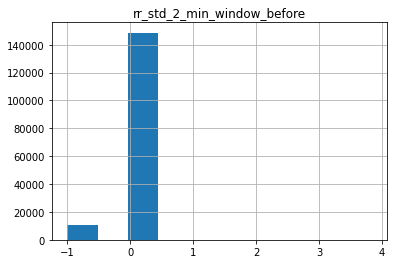

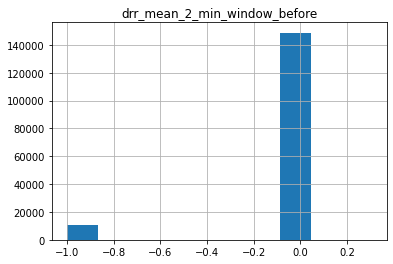

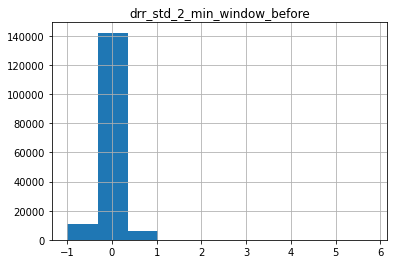

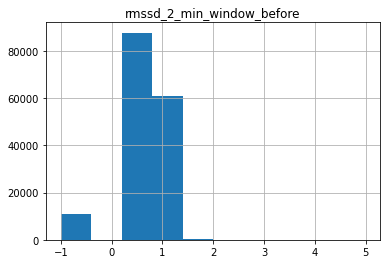

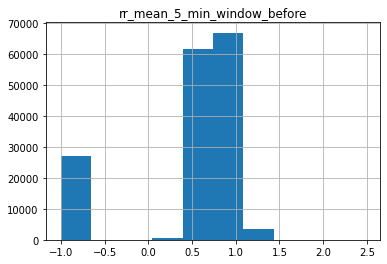

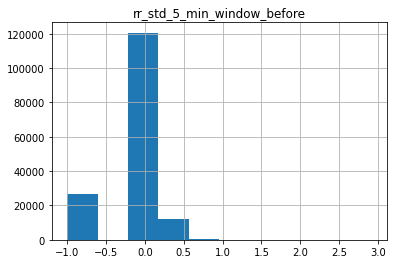

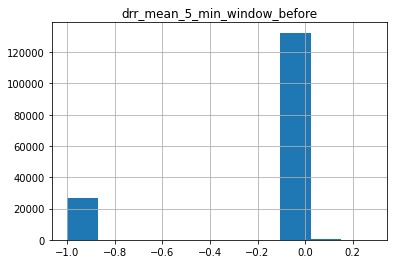

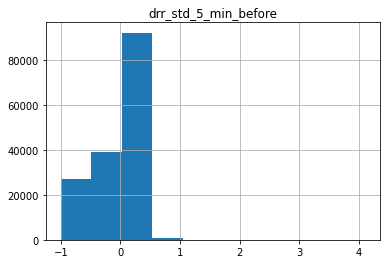

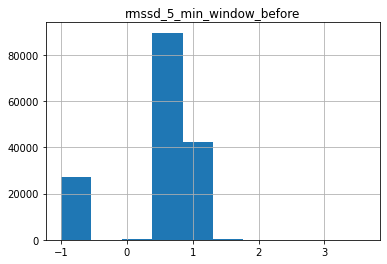

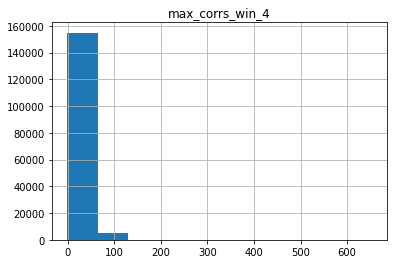

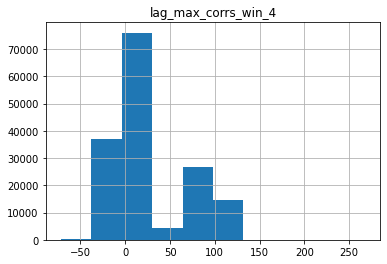

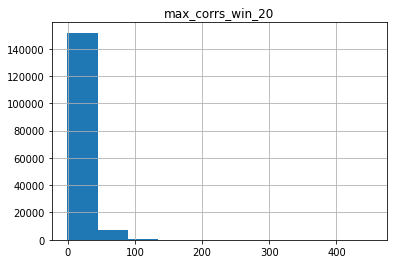

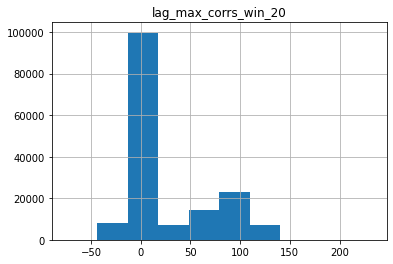

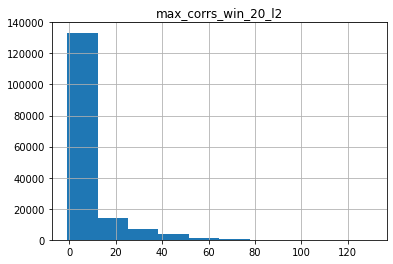

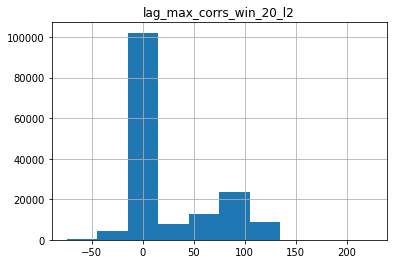

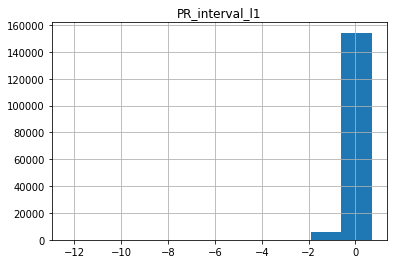

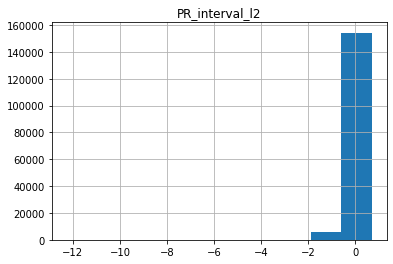

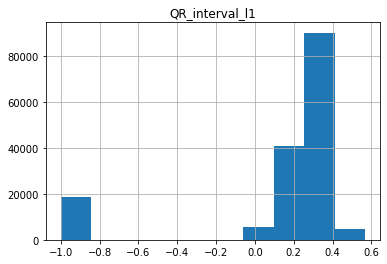

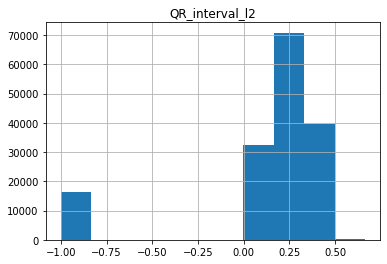

In [573]:
for column in train_features.columns:
  train_features.hist(column=column)

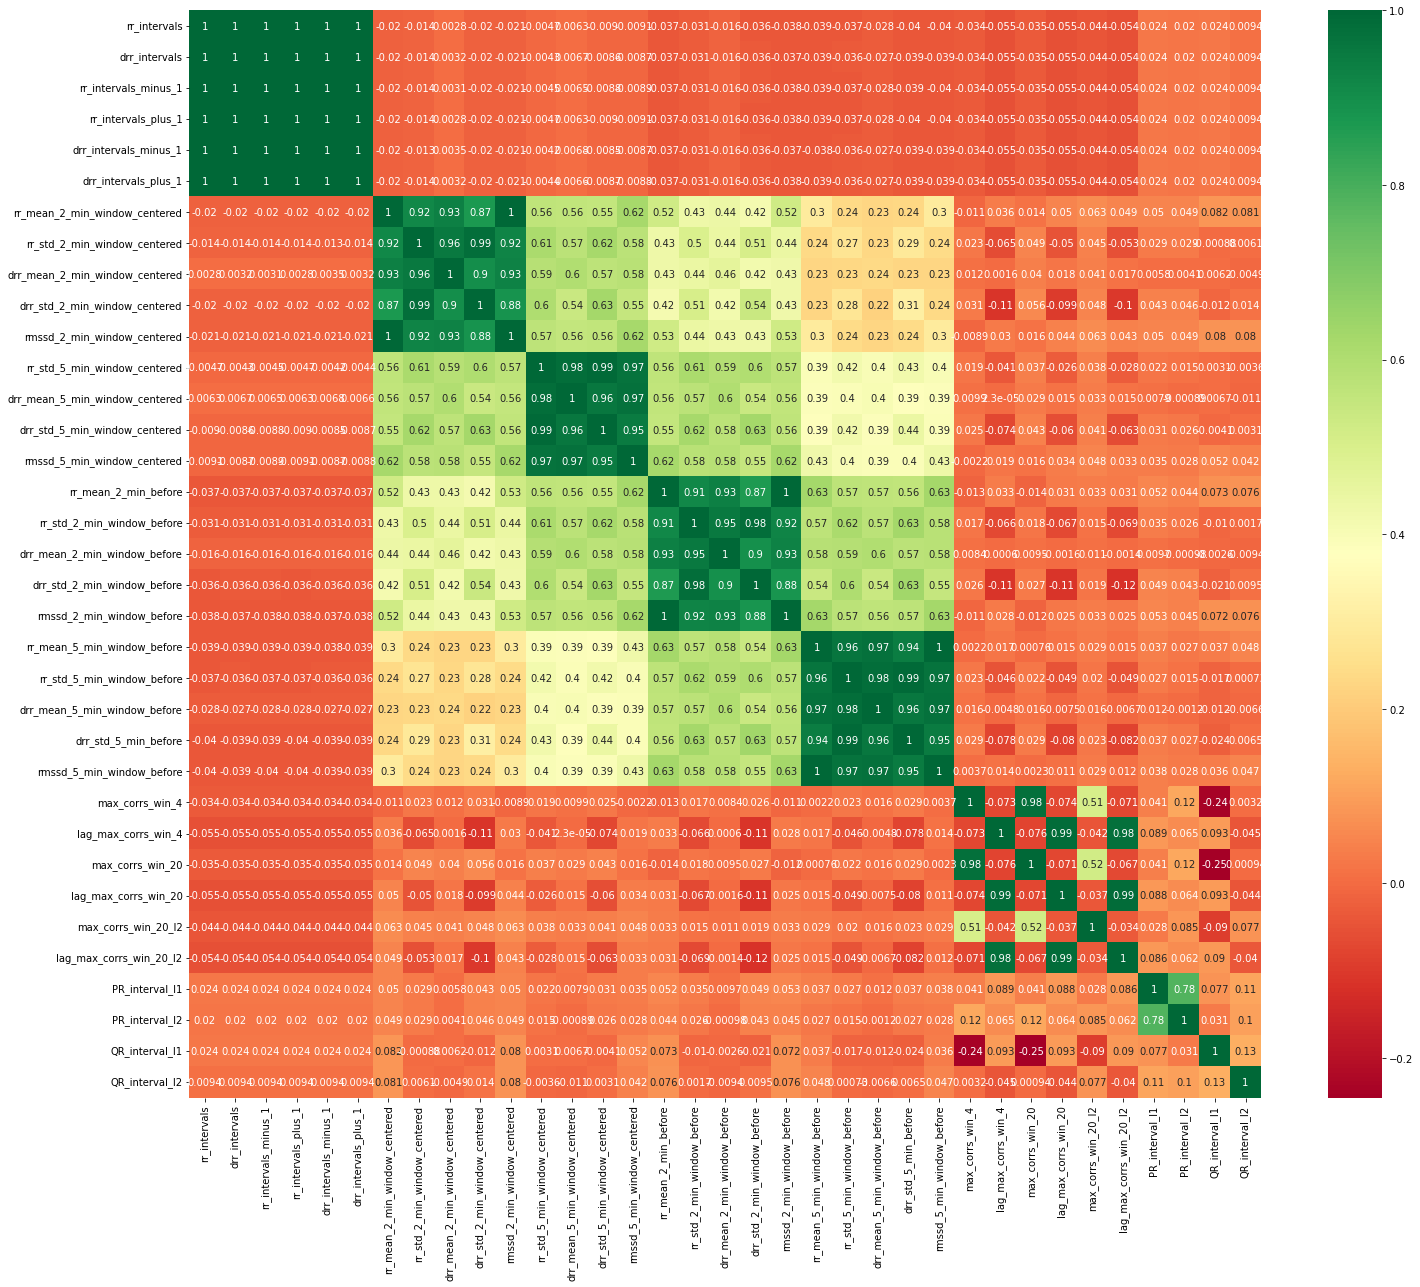

In [574]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(train_features.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

# Outliers removal

In [575]:
def plot_outliersAnalysis(abs_zscores):
  # number of outliers per subject 
  bool_zscores = (abs_zscores > 3).sum(axis=1)
  bool_zscores.hist()
  plt.title("Number of outliers per subject")
  plt.show()

  # number of outliers per feature 
  bool_zscores = (abs_zscores > 3).sum(axis=0)
  #bool_zscores.hist(bins = len(feature_list))
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])

  ax.bar(feature_list,bool_zscores)
  plt.title("Number of outliers per feature")
  plt.xticks(np.arange(len(feature_list)), feature_list,rotation=90)
  plt.show()
  return 

Run this part only if you want to remove outliers (it overwrites the training data)

Train subjects before outlier removal: (159768, 35)
Train subjects after outlier removal: (127079, 35)


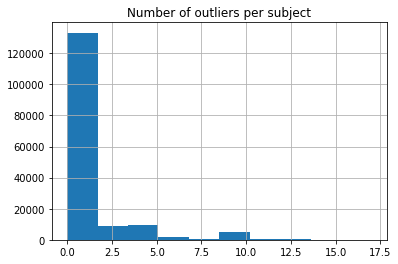

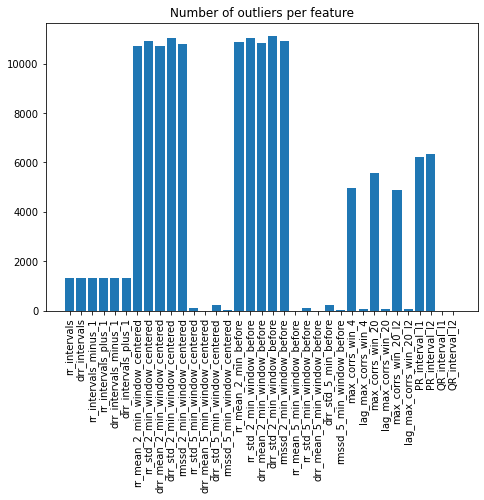

,rr_intervals,drr_intervals,rr_intervals_minus_1,rr_intervals_plus_1,drr_intervals_minus_1,drr_intervals_plus_1,rr_mean_2_min_window_centered,rr_std_2_min_window_centered,drr_mean_2_min_window_centered,drr_std_2_min_window_centered,rmssd_2_min_window_centered,rr_std_5_min_window_centered,drr_mean_5_min_window_centered,drr_std_5_min_window_centered,rmssd_5_min_window_centered,rr_mean_2_min_before,rr_std_2_min_window_before,drr_mean_2_min_window_before,drr_std_2_min_window_before,rmssd_2_min_window_before,rr_mean_5_min_window_before,rr_std_5_min_window_before,drr_mean_5_min_window_before,drr_std_5_min_before,rmssd_5_min_window_before,max_corrs_win_4,lag_max_corrs_win_4,max_corrs_win_20,lag_max_corrs_win_20,max_corrs_win_20_l2,lag_max_corrs_win_20_l2,PR_interval_l1,PR_interval_l2,QR_interval_l1,QR_interval_l2
194952,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.588000,0.085189,-0.001429,0.143253,0.594139,-1.000000,-1.000000,-1.000000,-1.000000,0.595200,0.072725,0.001600,0.121553,0.599627,0.585250,0.077900,0.001500,0.129297,0.590412,28.332666,79.0,27.188629,80.0,11.135957,80.0,0.196000,0.184000,0.184000,0.136000
39070,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.446970,0.011175,0.000000,0.014521,0.447109,0.010490,0.000300,0.014451,0.447389,0.441916,0.009165,0.000340,0.014837,0.442011,0.442356,0.008777,0.000422,0.014638,0.442443,0.602791,-24.0,0.708067,-24.0,1.495892,-24.0,0.125000,0.132812,0.203125,-1.000000
24980,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.757500,0.114383,0.002188,0.191322,0.766087,0.101895,0.002148,0.169407,0.763084,0.772569,0.123770,0.000868,0.211032,0.782421,0.779018,0.173212,-0.001116,0.298878,0.798042,2.190587,6.0,2.484710,6.0,2.169804,6.0,0.210938,0.148438,0.257812,0.132812
41040,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.457275,0.007038,0.000244,0.011797,0.457330,0.006346,0.000150,0.010669,0.457977,0.456861,0.006038,0.000000,0.009499,0.456901,0.457248,0.005671,0.000000,0.008831,0.457283,0.953174,-24.0,0.905347,-24.0,1.698956,-24.0,0.125000,0.132812,0.203125,0.093750
104771,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.011364,0.074962,-0.001420,0.122594,1.014138,0.061454,0.001608,0.100349,1.012437,1.011458,0.089526,0.002604,0.146982,1.015413,0.999349,0.073354,0.002930,0.116618,1.002038,19.130567,10.0,18.415822,10.0,4.137488,10.0,0.210938,0.210938,0.351562,0.359375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76290,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.927649,0.069505,-0.008832,0.114526,0.930250,0.075561,0.002387,0.112490,0.916315,0.911133,0.050772,0.001953,0.080316,0.912546,0.907752,0.056711,-0.000300,0.082665,0.909522,0.214562,-4.0,0.216154,-4.0,0.396601,-4.0,0.195312,0.171875,0.359375,0.093750
2209,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.636440,0.006430,0.000000,0.010440,0.636472,0.006555,0.000000,0.010268,0.636575,0.636102,0.006370,0.000411,0.010595,0.636134,0.636845,0.006543,0.000000,0.010869,0.636878,3.004441,0.0,3.101292,0.0,2.108790,0.0,0.187500,0.187500,0.281250,0.125000
123410,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.843099,0.015773,0.000651,0.028786,0.843246,0.059537,0.007812,0.093733,0.847694,0.842831,0.018151,0.001838,0.033951,0.843026,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,27.628173,1.0,28.576496,0.0,36.825041,0.0,0.273438,0.320312,0.101562,0.351562
17466,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.648158,0.014235,0.000837,0.015106,0.648315,0.014809,0.000545,0.015107,0.647153,0.647204,0.013944,0.000411,0.015516,0.647354,0.645833,0.014024,0.000260,0.015426,0.645986,25.398345,-2.0,25.683975,-2.0,7.462482,-2.0,0.242188,0.234375,0.242188,0.109375


In [576]:
from scipy.stats import zscore
import numpy as np

feature_list = train_features.columns.tolist()
print('Train subjects before outlier removal: ' + str(train_features.shape))

# apply zscore
zscore_features = train_features.apply(zscore, axis=0)

# select all those values with zscore < -+ 3 and discard outliers 
abs_zscores = np.abs(zscore_features)
filtered_entries = (abs_zscores < 3).all(axis=1)

train_features = train_features[filtered_entries]
train_target = train_target[filtered_entries]

print('Train subjects after outlier removal: ' + str(train_features.shape))


plot_outliersAnalysis(abs_zscores)
display(train_features)

# Normalize and train baseline model

In [577]:
# 2. Standarize data with RobustScaler transformation
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(train_features)
features_list = train_features.columns.tolist()
train_features_zscore = transformer.transform(train_features)
#Transform the numpy array back to a dataframe
train_features = pd.DataFrame(data=train_features_zscore, columns=features_list)
train_features.describe()

,rr_intervals,drr_intervals,rr_intervals_minus_1,rr_intervals_plus_1,drr_intervals_minus_1,drr_intervals_plus_1,rr_mean_2_min_window_centered,rr_std_2_min_window_centered,drr_mean_2_min_window_centered,drr_std_2_min_window_centered,rmssd_2_min_window_centered,rr_std_5_min_window_centered,drr_mean_5_min_window_centered,drr_std_5_min_window_centered,rmssd_5_min_window_centered,rr_mean_2_min_before,rr_std_2_min_window_before,drr_mean_2_min_window_before,drr_std_2_min_window_before,rmssd_2_min_window_before,rr_mean_5_min_window_before,rr_std_5_min_window_before,drr_mean_5_min_window_before,drr_std_5_min_before,rmssd_5_min_window_before,max_corrs_win_4,lag_max_corrs_win_4,max_corrs_win_20,lag_max_corrs_win_20,max_corrs_win_20_l2,lag_max_corrs_win_20_l2,PR_interval_l1,PR_interval_l2,QR_interval_l1,QR_interval_l2
count,127079.0,127079.0,127079.0,127079.0,127079.0,127079.0,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05
mean,0.0,0.0,0.0,0.0,0.0,0.0,2.394433e-16,1.065099e-16,1.393224e-16,-2.994516e-17,5.376259e-16,-4.404278e-16,7.289701e-16,2.963693e-16,-6.289776e-16,-4.893123e-16,2.360771e-17,-1.975388e-16,-7.869296e-17,-7.436806e-16,-3.897693e-17,1.830511e-16,1.587187e-16,-1.665793e-16,1.904404e-16,-1.360357e-16,-6.349760e-17,7.075674e-17,-6.900657e-16,-1.348039e-16,-2.043681e-16,-5.066846e-16,-2.036866e-16,2.587784e-16,-5.587719e-16
std,0.0,0.0,0.0,0.0,0.0,0.0,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,0.0,0.0,0.0,0.0,0.0,0.0,-3.049253e+00,-1.025833e+00,-1.532306e+01,-8.877024e-01,-3.051638e+00,-3.437507e+00,-3.524701e+00,-3.297307e+00,-3.328288e+00,-3.056457e+00,-9.738748e-01,-2.432542e+01,-8.582557e-01,-3.061441e+00,-2.699226e+00,-2.756819e+00,-2.805621e+00,-2.677670e+00,-2.698645e+00,-1.121067e+00,-2.337975e+00,-1.116557e+00,-2.415375e+00,-1.054880e+00,-2.397123e+00,-5.285250e+00,-5.156307e+00,-2.937484e+00,-3.036025e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,-7.256994e-01,-8.096123e-01,-2.128444e-01,-7.745364e-01,-7.331203e-01,7.307505e-02,2.778177e-01,-4.135122e-02,-3.726086e-02,-7.244925e-01,-7.841867e-01,-2.223100e-01,-7.466572e-01,-7.323245e-01,5.254463e-02,1.763422e-01,3.479939e-01,8.033650e-02,5.286542e-02,-8.222153e-01,-7.034452e-01,-8.204501e-01,-7.035099e-01,-6.619568e-01,-6.955414e-01,-7.256906e-02,-3.825931e-02,3.319095e-04,-8.467698e-03
50%,0.0,0.0,0.0,0.0,0.0,0.0,-6.465244e-02,-3.252659e-01,1.483091e-02,-3.988228e-01,-6.649601e-02,1.873376e-01,2.836029e-01,1.004393e-01,2.163074e-01,-6.727299e-02,-3.950646e-01,2.689865e-03,-4.967664e-01,-6.761482e-02,2.768533e-01,2.530136e-01,3.557219e-01,1.504797e-01,2.768220e-01,-2.514498e-01,-4.902458e-01,-2.502072e-01,-4.895268e-01,-3.040172e-01,-4.828436e-01,1.308060e-01,1.342190e-01,3.600645e-01,3.251611e-01
75%,0.0,0.0,0.0,0.0,0.0,0.0,7.353865e-01,5.179795e-01,2.411134e-01,4.928966e-01,7.368754e-01,3.698491e-01,2.867680e-01,4.171156e-01,4.971451e-01,7.315754e-01,5.090588e-01,2.181908e-01,4.871123e-01,7.338312e-01,5.218539e-01,4.258167e-01,3.596335e-01,4.596014e-01,5.243454e-01,5.660420e-01,9.547729e-01,5.559918e-01,9.608032e-01,2.963201e-01,9.587745e-01,3.637547e-01,3.527213e-01,4.799753e-01,4.911456e-01
max,0.0,0.0,0.0,0.0,0.0,0.0,3.815514e+00,8.920674e+00,2.785072e+01,7.192572e+00,4.144993e+00,3.117249e+00,9.753456e-01,3.653131e+00,1.858591e+00,3.870355e+00,1.109861e+01,1.530268e+01,6.963745e+00,4.482360e+00,1.444579e+00,2.880914e+

In [578]:
# Normalize the test set

features_list = test_features.columns.tolist()
test_features_zscore = transformer.transform(test_features)
#Transform the numpy array back to a dataframe
test_features = pd.DataFrame(data=test_features_zscore, columns=features_list)
test_features.describe()

,rr_intervals,drr_intervals,rr_intervals_minus_1,rr_intervals_plus_1,drr_intervals_minus_1,drr_intervals_plus_1,rr_mean_2_min_window_centered,rr_std_2_min_window_centered,drr_mean_2_min_window_centered,drr_std_2_min_window_centered,rmssd_2_min_window_centered,rr_std_5_min_window_centered,drr_mean_5_min_window_centered,drr_std_5_min_window_centered,rmssd_5_min_window_centered,rr_mean_2_min_before,rr_std_2_min_window_before,drr_mean_2_min_window_before,drr_std_2_min_window_before,rmssd_2_min_window_before,rr_mean_5_min_window_before,rr_std_5_min_window_before,drr_mean_5_min_window_before,drr_std_5_min_before,rmssd_5_min_window_before,max_corrs_win_4,lag_max_corrs_win_4,max_corrs_win_20,lag_max_corrs_win_20,max_corrs_win_20_l2,lag_max_corrs_win_20_l2,PR_interval_l1,PR_interval_l2,QR_interval_l1,QR_interval_l2
count,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000,53256.000000
mean,0.015733,0.007677,0.015732,0.015730,0.007680,0.007669,-0.736548,-1.065660,-11.007886,-0.635856,-0.730732,-0.337001,-0.351286,-0.322000,-0.334068,-0.713477,-1.018152,-8.031037,-0.608853,-0.707775,-0.175546,-0.171809,-0.178854,-0.165456,-0.174296,0.234277,-0.054185,0.222867,-0.057004,0.268318,-0.057505,-0.276016,-0.253059,-0.053122,-0.034792
std,0.178930,0.087287,0.178933,0.178893,0.087365,0.087198,2.822128,4.166731,40.545365,2.644342,2.824284,1.410999,1.419484,1.386334,1.378198,2.792238,4.040583,29.955359,2.577719,2.795410,1.170832,1.188236,1.186080,1.183375,1.172823,1.593543,0.989726,1.577792,0.987785,1.588574,0.987045,1.688833,1.645017,1.069400,1.053494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.477207,-15.793382,-160.268573,-9.478421,-10.450127,-3.437507,-3.524701,-3.297307,-3.328288,-10.443871,-15.420067,-119.528498,-9.276918,-10.417747,-2.699226,-2.756819,-2.805621,-2.677670,-2.698645,-1.121067,-2.409041,-1.116557,-2.296495,-1.054880,-2.373490,-13.665031,-13.108182,-2.937484,-3.036025
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.911160,-0.851462,-0.330395,-0.796753,-0.915644,0.056910,0.271206,-0.053771,-0.141465,-0.906035,-0.815103,-0.341355,-0.765546,-0.905919,-0.012695,0.168406,0.341723,0.073913,-0.007822,-0.810854,-0.727134,-0.817817,-0.727286,-0.658722,-0.719174,-0.073024,-0.094114,-0.019653,-0.008468
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.168171,-0.415540,-0.009828,-0.522794,-0.171314,0.157765,0.282776,0.035755,0.143109,-0.166239,-0.488031,0.002690,-0.581259,-0.166059,0.230848,0.237759,0.355557,0.130551,0.233929,-0.216805,-0.513935,-0.224401,-0.513303,-0.259525,-0.506477,0.130806,0.129304,0.360064,0.325161
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648377,0.413842,0.200344,0.404873,0.656881,0.343725,0.286073,0.372798,0.454667,0.662835,0.417340,0.184833,0.400531,0.665271,0.496330,0.407809,0.359290,0.433316,0.499275,0.690377,0.907395,0.671565,0.889475,0.461649,0.887875,0.363755,0.352721,0.480135,0.491146
max,2.224000,1.064000,2.220000,2.172000,1.596000,1.056000,8.987880,42.950033,88.444998,35.515056,17.585291,8.083112,0.906703,10.173930,4.574615,10.972317,45.609187,107.106657,37.983711,19.178682,2.879211,7.850393,2.101148,10.179548,4.712146,50.571402,3.915877,34.191992,4.122998,19.625130,4.149241,3.794742,3.480566,1.179455,1.196580


In [579]:
train_features.describe()

,rr_intervals,drr_intervals,rr_intervals_minus_1,rr_intervals_plus_1,drr_intervals_minus_1,drr_intervals_plus_1,rr_mean_2_min_window_centered,rr_std_2_min_window_centered,drr_mean_2_min_window_centered,drr_std_2_min_window_centered,rmssd_2_min_window_centered,rr_std_5_min_window_centered,drr_mean_5_min_window_centered,drr_std_5_min_window_centered,rmssd_5_min_window_centered,rr_mean_2_min_before,rr_std_2_min_window_before,drr_mean_2_min_window_before,drr_std_2_min_window_before,rmssd_2_min_window_before,rr_mean_5_min_window_before,rr_std_5_min_window_before,drr_mean_5_min_window_before,drr_std_5_min_before,rmssd_5_min_window_before,max_corrs_win_4,lag_max_corrs_win_4,max_corrs_win_20,lag_max_corrs_win_20,max_corrs_win_20_l2,lag_max_corrs_win_20_l2,PR_interval_l1,PR_interval_l2,QR_interval_l1,QR_interval_l2
count,127079.0,127079.0,127079.0,127079.0,127079.0,127079.0,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05,1.270790e+05
mean,0.0,0.0,0.0,0.0,0.0,0.0,2.394433e-16,1.065099e-16,1.393224e-16,-2.994516e-17,5.376259e-16,-4.404278e-16,7.289701e-16,2.963693e-16,-6.289776e-16,-4.893123e-16,2.360771e-17,-1.975388e-16,-7.869296e-17,-7.436806e-16,-3.897693e-17,1.830511e-16,1.587187e-16,-1.665793e-16,1.904404e-16,-1.360357e-16,-6.349760e-17,7.075674e-17,-6.900657e-16,-1.348039e-16,-2.043681e-16,-5.066846e-16,-2.036866e-16,2.587784e-16,-5.587719e-16
std,0.0,0.0,0.0,0.0,0.0,0.0,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,0.0,0.0,0.0,0.0,0.0,0.0,-3.049253e+00,-1.025833e+00,-1.532306e+01,-8.877024e-01,-3.051638e+00,-3.437507e+00,-3.524701e+00,-3.297307e+00,-3.328288e+00,-3.056457e+00,-9.738748e-01,-2.432542e+01,-8.582557e-01,-3.061441e+00,-2.699226e+00,-2.756819e+00,-2.805621e+00,-2.677670e+00,-2.698645e+00,-1.121067e+00,-2.337975e+00,-1.116557e+00,-2.415375e+00,-1.054880e+00,-2.397123e+00,-5.285250e+00,-5.156307e+00,-2.937484e+00,-3.036025e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,-7.256994e-01,-8.096123e-01,-2.128444e-01,-7.745364e-01,-7.331203e-01,7.307505e-02,2.778177e-01,-4.135122e-02,-3.726086e-02,-7.244925e-01,-7.841867e-01,-2.223100e-01,-7.466572e-01,-7.323245e-01,5.254463e-02,1.763422e-01,3.479939e-01,8.033650e-02,5.286542e-02,-8.222153e-01,-7.034452e-01,-8.204501e-01,-7.035099e-01,-6.619568e-01,-6.955414e-01,-7.256906e-02,-3.825931e-02,3.319095e-04,-8.467698e-03
50%,0.0,0.0,0.0,0.0,0.0,0.0,-6.465244e-02,-3.252659e-01,1.483091e-02,-3.988228e-01,-6.649601e-02,1.873376e-01,2.836029e-01,1.004393e-01,2.163074e-01,-6.727299e-02,-3.950646e-01,2.689865e-03,-4.967664e-01,-6.761482e-02,2.768533e-01,2.530136e-01,3.557219e-01,1.504797e-01,2.768220e-01,-2.514498e-01,-4.902458e-01,-2.502072e-01,-4.895268e-01,-3.040172e-01,-4.828436e-01,1.308060e-01,1.342190e-01,3.600645e-01,3.251611e-01
75%,0.0,0.0,0.0,0.0,0.0,0.0,7.353865e-01,5.179795e-01,2.411134e-01,4.928966e-01,7.368754e-01,3.698491e-01,2.867680e-01,4.171156e-01,4.971451e-01,7.315754e-01,5.090588e-01,2.181908e-01,4.871123e-01,7.338312e-01,5.218539e-01,4.258167e-01,3.596335e-01,4.596014e-01,5.243454e-01,5.660420e-01,9.547729e-01,5.559918e-01,9.608032e-01,2.963201e-01,9.587745e-01,3.637547e-01,3.527213e-01,4.799753e-01,4.911456e-01
max,0.0,0.0,0.0,0.0,0.0,0.0,3.815514e+00,8.920674e+00,2.785072e+01,7.192572e+00,4.144993e+00,3.117249e+00,9.753456e-01,3.653131e+00,1.858591e+00,3.870355e+00,1.109861e+01,1.530268e+01,6.963745e+00,4.482360e+00,1.444579e+00,2.880914e+

In [580]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def plot_confusionMatrix(test_labels, test_predicted, clf):
  cm = confusion_matrix(test_labels, test_predicted, labels=clf.classes_, normalize='true')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=['N', 'V', 'S'])
  disp.plot()
  plt.show()
  return 
  
def test_model(train_features, train_labels, test_features, test_labels, clf):
  clf.fit(train_features, train_labels)

  # Predict test labels
  test_predicted = clf.predict(test_features)

  # plot confusion matrix
  plot_confusionMatrix(test_labels, test_predicted, clf)

  # display classification results
  print(classification_report(test_labels, test_predicted, target_names=['N', 'V', 'S']))

In [581]:
"Training a Baseline Model"
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
logisticRegression = LogisticRegression(random_state=SEED, class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=SEED)

score = cross_val_score(logisticRegression, train_features, train_target, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise', verbose=1)
print(np.mean(score))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.4292457272003052


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   42.3s finished


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


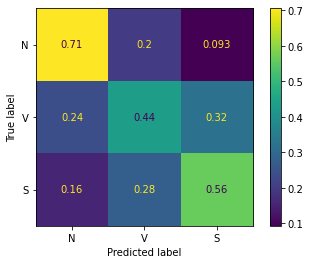

              precision    recall  f1-score   support

           N       0.98      0.71      0.82     49005
           V       0.09      0.44      0.15      2329
           S       0.17      0.56      0.26      1922

    accuracy                           0.69     53256
   macro avg       0.41      0.57      0.41     53256
weighted avg       0.91      0.69      0.77     53256



In [582]:
test_model(train_features, train_target, test_features, test_target, logisticRegression)

In [583]:
"Try a Random Forest classifier"

from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators=100,
                       criterion='gini', 
                       max_depth=None, 
                       min_samples_split=2, 
                       min_samples_leaf=1,
                       min_weight_fraction_leaf=0.0,
                       max_features='auto',
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       bootstrap=True,
                       oob_score=False,
                       n_jobs=None,
                       random_state=None, 
                       verbose=0,
                       warm_start=False,
                       class_weight='balanced',
                       ccp_alpha=0.0, 
                       max_samples=None)

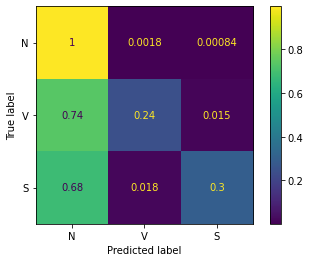

              precision    recall  f1-score   support

           N       0.94      1.00      0.97     49005
           V       0.82      0.24      0.38      2329
           S       0.88      0.30      0.45      1922

    accuracy                           0.94     53256
   macro avg       0.88      0.51      0.60     53256
weighted avg       0.93      0.94      0.92     53256



In [584]:
test_model(train_features, train_target, test_features, test_target, randomForest)

# Resampling

Run this part only if you want to use resampling (it overwrites the training data)

In [585]:
!pip install imbalanced-learn

In [586]:
# Perform resampling over the dataset to balance classes
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# summarize class distribution
print(Counter(train_target))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform (applied 2 times to balance all classes)
train_features, train_target = undersample.fit_resample(train_features, train_target)
train_features, train_target = undersample.fit_resample(train_features, train_target)
# summarize class distribution
print(Counter(train_target))

Counter({'N': 116891, 'S': 5605, 'V': 4583})
Counter({'N': 4583, 'S': 4583, 'V': 4583})


In [587]:
train_features.shape

(13749, 35)

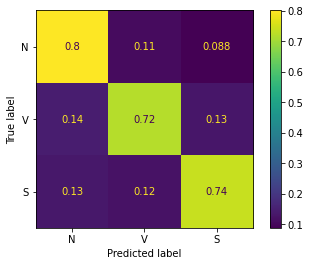

              precision    recall  f1-score   support

           N       0.99      0.80      0.88     49005
           V       0.23      0.72      0.35      2329
           S       0.24      0.74      0.36      1922

    accuracy                           0.80     53256
   macro avg       0.48      0.76      0.53     53256
weighted avg       0.92      0.80      0.84     53256



In [588]:
test_model(train_features, train_target, test_features, test_target, randomForest)

# boxplot of max correlations feature just to check (it is a bad boxplot)

In [589]:
max_corrs20_N = []
max_corrs20_V = []
max_corrs20_S = []

max_corrs20 = train_features['max_corrs_win_20'].tolist()
label = train_target.tolist()

for i in range(len(max_corrs20)):
  if label[i] == 'N':
    max_corrs20_N.append(max_corrs20[i])
  elif label[i] == 'V':
    max_corrs20_V.append(max_corrs20[i])
  else:
    max_corrs20_S.append(max_corrs20[i])

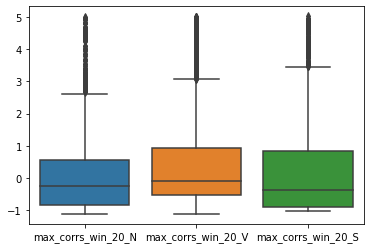

In [590]:
boxplot_dictionary_max_corr20 = dict( max_corrs_win_20_N = max_corrs20_N, max_corrs_win_20_V = max_corrs20_V, max_corrs_win_20_S = max_corrs20_S )
df_corrs = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in boxplot_dictionary_max_corr20.items() ]))
sns.boxplot(data = df_corrs)

In [591]:
df_corrs.describe()

,max_corrs_win_20_N,max_corrs_win_20_V,max_corrs_win_20_S
count,4583.000000,4583.000000,4583.000000
mean,-0.007984,0.293893,0.045915
std,0.990016,1.175114,1.161140
min,-1.116557,-1.116557,-1.009359
25%,-0.827719,-0.515815,-0.897535
50%,-0.254790,-0.090062,-0.359508
75%,0.551969,0.921640,0.849050
max,5.007912,5.013219,5.018829


# Principal Component Analysis

In [592]:
"Perform Principal Components Analysis (PCA)"

#utility function used to plot the data points in the new space defined by pca
def plot_PCAanalysis(train_features_pca, pc_plot):
  principalComponents_Df = pd.DataFrame(data = train_features_pca[:,pc_plot],
                                      columns = ['principal component 1', 'principal component 2'])
  plt.figure()
  plt.figure(figsize=(10,10))
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=14)
  plt.xlabel('Principal Component - 1',fontsize=20)
  plt.ylabel('Principal Component - 2',fontsize=20)
  plt.title("Principal Component Analysis",fontsize=20)
  targets = ['N', 'V', 'S']
  colors = ['r', 'g', 'b']
  for target, color in zip(targets,colors):
    indicesToKeep = np.array(train_target) == target
    plt.scatter(principalComponents_Df.loc[indicesToKeep, 'principal component 1']
                , principalComponents_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

  plt.legend(targets,prop={'size': 15})
  return 

(13749, 7)
(53256, 7)


<Figure size 432x288 with 0 Axes>

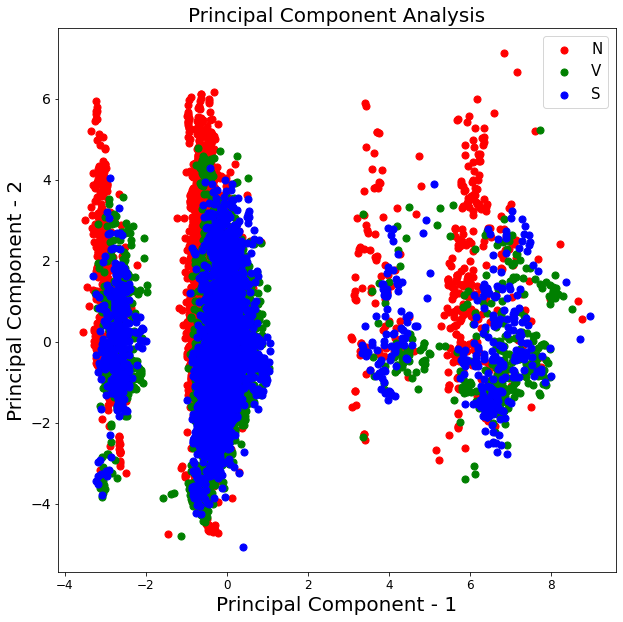

In [593]:
from sklearn.decomposition import PCA

varianceThreshold = 0.80
pca_features = PCA(n_components = varianceThreshold, random_state= 1234)
pca_features.fit(train_features)

train_features_pca = pca_features.transform(train_features)
print(np.shape(train_features_pca))

# decide components to show
pc_plot = [2, 3]

plot_PCAanalysis(train_features_pca, pc_plot)

# adapt test set
test_features_pca = pca_features.transform(test_features)
print(np.shape(test_features_pca))

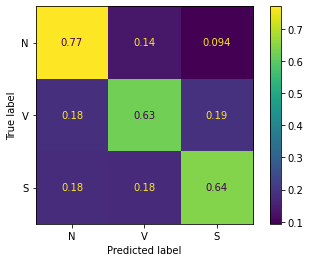

              precision    recall  f1-score   support

           N       0.98      0.77      0.86     49005
           V       0.17      0.63      0.27      2329
           S       0.20      0.64      0.30      1922

    accuracy                           0.76     53256
   macro avg       0.45      0.68      0.48     53256
weighted avg       0.92      0.76      0.82     53256



In [594]:
# use new pca space and look for changes in results
test_model(train_features_pca, train_target, test_features_pca, test_target, randomForest)

# Eliminate correlated features

Execute only if want to eliminate correlated features, it overwrites the data

In [595]:
def plot_correlationMatrix(correlation_matrix, features):
    f = plt.figure(figsize=(10, 8))
    plt.matshow(correlation_matrix, fignum=f.number)
    plt.xticks(range(len(features)), features, fontsize=10, rotation=90)
    plt.yticks(range(len(features)), features, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16)
    # plt.tight_layout()
    return 

Deleted features: {'rr_mean_5_min_window_before', 'rr_mean_2_min_before', 'rr_std_2_min_window_centered', 'rr_std_5_min_window_before', 'drr_mean_5_min_window_centered', 'rmssd_5_min_window_before', 'rr_std_5_min_window_centered', 'rr_std_2_min_window_before', 'drr_mean_5_min_window_before', 'drr_std_2_min_window_before', 'lag_max_corrs_win_4', 'lag_max_corrs_win_20', 'rr_mean_2_min_window_centered', 'rmssd_5_min_window_centered', 'rmssd_2_min_window_before', 'max_corrs_win_4'}


,rr_intervals,drr_intervals,rr_intervals_minus_1,rr_intervals_plus_1,drr_intervals_minus_1,drr_intervals_plus_1,drr_mean_2_min_window_centered,drr_std_2_min_window_centered,rmssd_2_min_window_centered,drr_std_5_min_window_centered,drr_mean_2_min_window_before,drr_std_5_min_before,max_corrs_win_20,max_corrs_win_20_l2,lag_max_corrs_win_20_l2,PR_interval_l1,PR_interval_l2,QR_interval_l1,QR_interval_l2
0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029891,0.074047,-0.872676,0.213780,-1.257991,0.300894,-0.484104,-0.424894,-0.695541,-0.300058,-0.205822,0.300109,0.387405
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.478349,-0.724986,-0.335095,-0.007335,-0.050435,0.119012,-0.736616,0.316551,2.069529,-0.102143,0.019829,0.449438,0.490814
2,0.0,0.0,0.0,0.0,0.0,0.0,0.014831,-0.808452,-1.077742,-3.297307,0.002690,0.083009,-0.930011,-0.882788,-0.766441,-4.565475,-4.618318,-2.937484,0.138429
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.037345,-0.155700,0.091625,0.295522,-0.204830,0.401282,-0.864698,-0.678280,-1.002771,-5.816664,-5.791260,0.360064,0.636382
4,0.0,0.0,0.0,0.0,0.0,0.0,0.014831,-0.815750,-0.765661,-0.053105,0.002690,0.076537,-0.703546,-0.584672,-0.648275,0.211792,0.129304,-0.119579,0.076184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53251,0.0,0.0,0.0,0.0,0.0,0.0,-160.268573,-9.478421,-10.450127,-3.297307,0.127202,0.101489,-1.116557,-1.054880,-0.671908,0.268664,1.078828,-0.139564,0.823115
53252,0.0,0.0,0.0,0.0,0.0,0.0,-0.193871,2.060226,0.751585,0.936546,1.595707,0.869151,0.301389,1.497964,-0.553743,0.211792,0.464430,0.519946,0.304413
53253,0.0,0.0,0.0,0.0,0.0,0.0,0.111155,-0.811881,-0.100146,-0.052232,0.313969,0.071418,7.588298,4.062696,-0.790074,0.041175,0.464430,0.499960,0.387405
53254,0.0,0.0,0.0,0.0,0.0,0.0,0.064149,-0.764048,-0.252408,-3.297307,-119.528498,-2.677670,-0.255901,-0.284125,1.384170,0.218162,0.277206,0.480135,0.427076


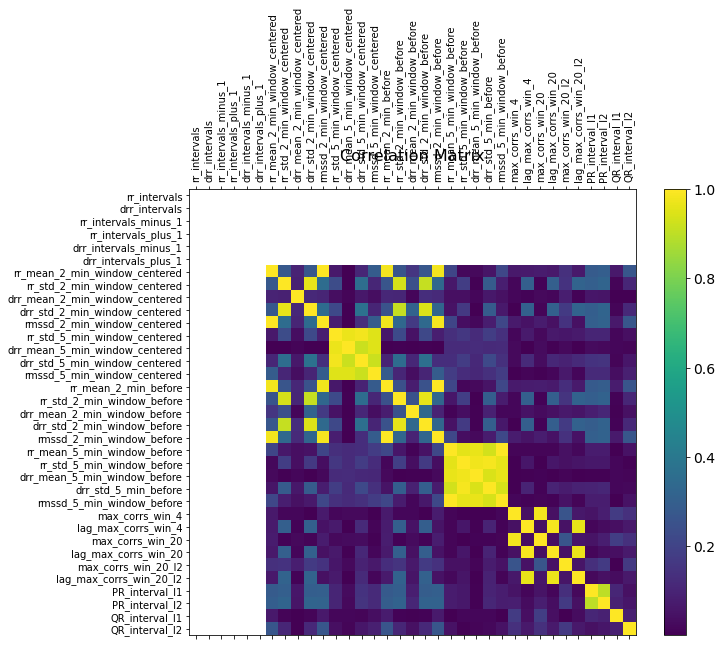

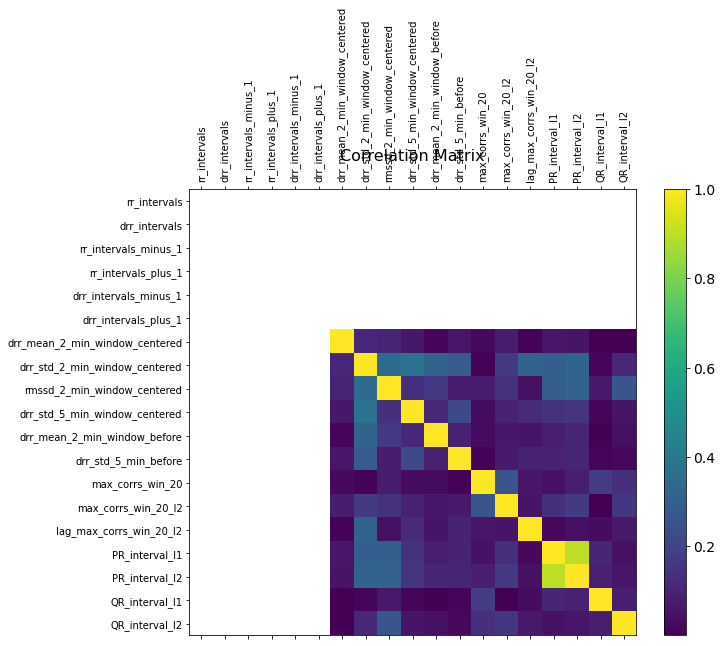

In [596]:
# visualize correlation matrix

feature_list = train_features.columns.tolist()

cor_matrix = train_features.corr().abs()
plot_correlationMatrix(cor_matrix, feature_list)

# drop correlated features with correlation greater than 0.9
correlated_features = set()
correlation_matrix = train_features.corr()
median_corr = (correlation_matrix.abs()).median(axis=0)

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            if median_corr[i] < median_corr[j]:
                colname = correlation_matrix.columns[i]
            else:
                colname = correlation_matrix.columns[j]
            correlated_features.add(colname)           
train_features.drop(labels=correlated_features, axis=1, inplace=True)
# see how it drops correlated / drop teh one that had a lower correlation w.r to the other feat 
print('Deleted features: ' + str(correlated_features))

# plot correlation matrix with remaining features
cor_matrix = train_features.corr().abs()
feature_list = list(train_features.columns)
f2 = plot_correlationMatrix(cor_matrix, feature_list)

# adapt test set: pick only selected features
test_features = test_features[feature_list]
display(test_features)

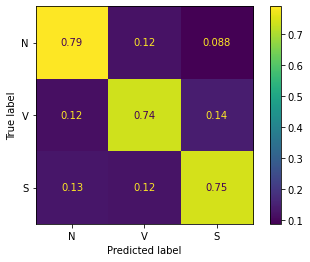

              precision    recall  f1-score   support

           N       0.99      0.79      0.88     49005
           V       0.22      0.74      0.34      2329
           S       0.24      0.75      0.36      1922

    accuracy                           0.79     53256
   macro avg       0.48      0.76      0.52     53256
weighted avg       0.93      0.79      0.84     53256



In [597]:
# test model without correlated features
test_model(train_features, train_target, test_features, test_target, randomForest)

# ROC curve and AUC

In [598]:
!pip install scikit-plot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


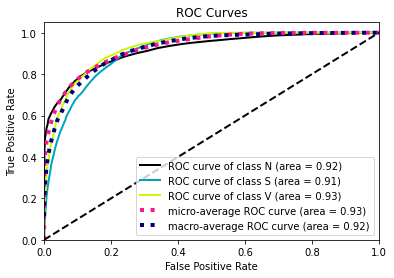

(53256, 3)

In [599]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = test_target
y_probas = randomForest.predict_proba(test_features)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()
y_probas.shape

In [600]:
# utility function to plot the selected features

def plot_recurrentFE(min_features_to_select, rfecv):
  plt.figure()
  plt.xlabel("Number of features selected")
  plt.ylabel("Cross validation score (accuracy)")
  plt.plot(range(min_features_to_select,
                len(rfecv.grid_scores_) + min_features_to_select),
          rfecv.grid_scores_)
  plt.show()

In [601]:
train_features.shape

(13749, 19)

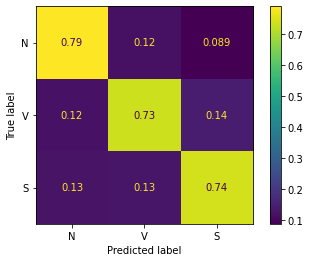

              precision    recall  f1-score   support

           N       0.99      0.79      0.88     49005
           V       0.22      0.73      0.33      2329
           S       0.23      0.74      0.35      1922

    accuracy                           0.78     53256
   macro avg       0.48      0.75      0.52     53256
weighted avg       0.93      0.78      0.83     53256



In [602]:
test_model(train_features, train_target, test_features, test_target, randomForest)

# Estimation of the feature importance using Ensamble Tree

In [603]:
from sklearn.ensemble import ExtraTreesClassifier

randomForest = ExtraTreesClassifier(n_estimators=250, class_weight='balanced', random_state = SEED)
randomForest.fit(train_features, train_target)


ExtraTreesClassifier(class_weight='balanced', n_estimators=250,
                     random_state=1234)

In [604]:
importances = randomForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in randomForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_features.shape[1]):
    print("%2d. feature %2d %7s (%.3f)" % (f + 1, indices[f], feature_list[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature  7 drr_std_2_min_window_centered (0.162)
 2. feature 14 lag_max_corrs_win_20_l2 (0.096)
 3. feature 10 drr_mean_2_min_window_before (0.095)
 4. feature  8 rmssd_2_min_window_centered (0.080)
 5. feature 12 max_corrs_win_20 (0.079)
 6. feature  9 drr_std_5_min_window_centered (0.076)
 7. feature 11 drr_std_5_min_before (0.074)
 8. feature 13 max_corrs_win_20_l2 (0.072)
 9. feature 16 PR_interval_l2 (0.057)
10. feature 17 QR_interval_l1 (0.056)
11. feature 18 QR_interval_l2 (0.055)
12. feature 15 PR_interval_l1 (0.054)
13. feature  6 drr_mean_2_min_window_centered (0.044)
14. feature  5 drr_intervals_plus_1 (0.000)
15. feature  4 drr_intervals_minus_1 (0.000)
16. feature  3 rr_intervals_plus_1 (0.000)
17. feature  2 rr_intervals_minus_1 (0.000)
18. feature  1 drr_intervals (0.000)
19. feature  0 rr_intervals (0.000)


Detection of low variance features

In [605]:
from sklearn.feature_selection import VarianceThreshold
feature_selection_variance_model = VarianceThreshold(threshold=0.0001)
X_selected_features_variance = feature_selection_variance_model.fit_transform(train_features)

feature_list = train_features.columns.tolist()
mask = feature_selection_variance_model.get_support() #list of booleans

train_features_selected = train_features
test_features_selected = test_features

for i, feature in enumerate(feature_list):
  if(mask[i] == False):
    print(feature, "Discarded") 
    #drop the low variance features
    train_features_selected.drop(labels=feature, axis=1, inplace=True)
    test_features_selected.drop(labels=feature, axis=1, inplace=True)

rr_intervals Discarded
drr_intervals Discarded
rr_intervals_minus_1 Discarded
rr_intervals_plus_1 Discarded
drr_intervals_minus_1 Discarded
drr_intervals_plus_1 Discarded


Recoursive Feature Elimination

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


Optimal number of features : 13


,ranking,selected
drr_mean_2_min_window_centered,1,True
drr_std_2_min_window_centered,1,True
rmssd_2_min_window_centered,1,True
drr_std_5_min_window_centered,1,True
drr_mean_2_min_window_before,1,True
drr_std_5_min_before,1,True
max_corrs_win_20,1,True
max_corrs_win_20_l2,1,True
lag_max_corrs_win_20_l2,1,True
PR_interval_l1,1,True


,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score
0,0.781368,0.004567,0.780718,0.787258,0.776128
1,0.785512,0.003564,0.790320,0.784418,0.781798
2,0.785004,0.001076,0.784867,0.786385,0.783760
3,0.788495,0.003288,0.787485,0.792931,0.785069
4,0.795041,0.002224,0.792286,0.797731,0.795105
5,0.798022,0.000984,0.797958,0.799258,0.796850
6,0.800931,0.004256,0.802540,0.805149,0.795104
7,0.801367,0.005237,0.802541,0.807113,0.794448
8,0.802459,0.004299,0.801887,0.807986,0.797503


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


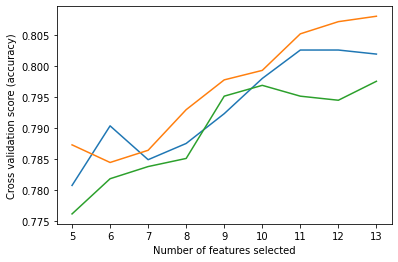

In [606]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE (recursive feature elimation) object and compute a cross-validated score.

min_features_to_select = 5

rfecv = RFECV(estimator=randomForest, step=1, cv=StratifiedKFold(3),
              scoring='balanced_accuracy',
              min_features_to_select=min_features_to_select)

rfecv.fit(train_features_selected, train_target)

print("Optimal number of features : %d" % rfecv.n_features_)

# adapt train & test set
train_features_selected = train_features_selected.iloc[:, rfecv.support_]
test_features_selected = test_features_selected.iloc[:, rfecv.support_]

fs_results_2 = pd.DataFrame({'ranking': rfecv.ranking_, 'selected': rfecv.support_},
                              index = [rfecv.feature_names_in_])
display(fs_results_2)

fs_results_1 = pd.DataFrame(rfecv.cv_results_)
display(fs_results_1)

# Plot number of features VS. cross-validation scores
plot_recurrentFE(min_features_to_select, rfecv)

In [607]:
train_features_selected.shape

(13749, 13)

In [608]:
randomForest = RandomForestClassifier(n_estimators=100,
                       criterion='gini', 
                       max_depth=None, 
                       min_samples_split=2, 
                       min_samples_leaf=1,
                       min_weight_fraction_leaf=0.0,
                       max_features='auto',
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       bootstrap=True,
                       oob_score=False,
                       n_jobs=None,
                       random_state=SEED, 
                       verbose=0,
                       warm_start=False,
                       class_weight='balanced',
                       ccp_alpha=0.0, 
                       max_samples=None)

In [609]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)

score = cross_val_score(randomForest, train_features_selected, train_target, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise', verbose=1)
print(np.mean(score))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8049946946844163


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   57.9s finished


In [610]:
from sklearn.ensemble import GradientBoostingClassifier

gradientBoosting = GradientBoostingClassifier(random_state=SEED)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)

score = cross_val_score(gradientBoosting, train_features_selected, train_target, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise', verbose=1)
#score = cross_val_score(logisticRegression, train_features[['drr_std_2_min_window_before','lag_max_corrs_win_20', 'rr_std_2_min_window_before', 'drr_std_2_min_window_centered']], train_target, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise', verbose=1)
print(np.mean(score))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.7647050397751876


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.2min finished


In [611]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(random_state=SEED)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)

score = cross_val_score(adaBoost, train_features_selected, train_target, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise', verbose=1)
print(np.mean(score))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.6834747044426124


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   34.6s finished


In [612]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(knn, train_features_selected, train_target, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise', verbose=1)
print(np.mean(score))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.7381621086481693


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.9s finished


In [613]:
logistic = LogisticRegression(random_state=SEED)
score = cross_val_score(logistic, train_features_selected, train_target, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise', verbose=1)
print(np.mean(score))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.5773423609795353


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.9s finished


In [614]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),max_samples=0.5, max_features=0.5)
score = cross_val_score(bagging, train_features_selected, train_target, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise', verbose=1)
print(np.mean(score))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.7524903069838319


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.0s finished


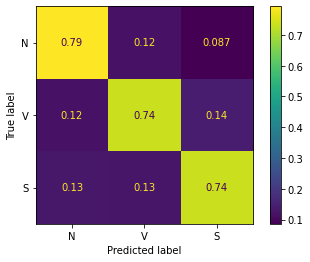

              precision    recall  f1-score   support

           N       0.99      0.79      0.88     49005
           V       0.22      0.74      0.34      2329
           S       0.24      0.74      0.36      1922

    accuracy                           0.79     53256
   macro avg       0.48      0.76      0.52     53256
weighted avg       0.93      0.79      0.84     53256



In [615]:
test_model(train_features_selected, train_target, test_features_selected, test_target, randomForest)


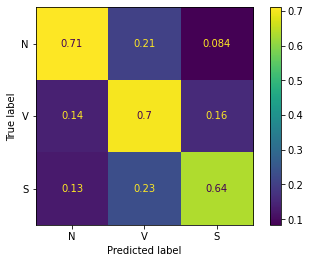

              precision    recall  f1-score   support

           N       0.98      0.71      0.82     49005
           V       0.13      0.70      0.22      2329
           S       0.21      0.64      0.32      1922

    accuracy                           0.71     53256
   macro avg       0.44      0.68      0.46     53256
weighted avg       0.92      0.71      0.78     53256



In [616]:
test_model(train_features_selected, train_target, test_features_selected, test_target, knn)

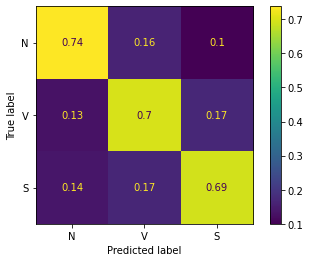

              precision    recall  f1-score   support

           N       0.98      0.74      0.84     49005
           V       0.16      0.70      0.27      2329
           S       0.20      0.69      0.31      1922

    accuracy                           0.73     53256
   macro avg       0.45      0.71      0.47     53256
weighted avg       0.92      0.73      0.80     53256



In [617]:
test_model(train_features_selected, train_target, test_features_selected, test_target, bagging)

In [618]:
from sklearn.ensemble import StackingClassifier


def get_stacking():
  level0 = list()
  level0.append(('random_forest', RandomForestClassifier(n_estimators=100,
                       criterion='gini', 
                       max_depth=None, 
                       min_samples_split=2, 
                       min_samples_leaf=1,
                       min_weight_fraction_leaf=0.0,
                       max_features='auto',
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       bootstrap=True,
                       oob_score=False,
                       n_jobs=None,
                       random_state=SEED, 
                       verbose=0,
                       warm_start=False,
                       class_weight='balanced',
                       ccp_alpha=0.0, 
                       max_samples=None)))
  
  level0.append(('knn', KNeighborsClassifier(n_neighbors=5)))
 # level0.append(('logistic', LogisticRegression(random_state=SEED, max_iter=1000)))
  level1 = LogisticRegression()
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

stacking_model = get_stacking()

In [619]:
from sklearn.model_selection import cross_val_score
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
score = cross_val_score(stacking_model, train_features_selected, train_target, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
print(np.mean(score))

0.8063735764324833


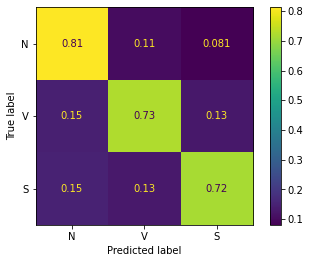

              precision    recall  f1-score   support

           N       0.98      0.81      0.89     49005
           V       0.24      0.73      0.36      2329
           S       0.24      0.72      0.36      1922

    accuracy                           0.81     53256
   macro avg       0.49      0.75      0.54     53256
weighted avg       0.93      0.81      0.85     53256



In [620]:
test_model(train_features_selected, train_target, test_features_selected, test_target, stacking_model)

In [519]:
# 1. Define the values for each hyperparameter
param_grid = {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800]}

# 2. Crossvalidate model to obtain the best fit 
from sklearn.model_selection import RandomizedSearchCV

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=SEED)
clf = RandomizedSearchCV(randomForest, param_grid, cv = cv, scoring='f1_macro')
clf.fit(train_features_selected, train_target)

for param, score in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']):
    print(param, score)

print('Best combination of hyperparameters: ' + str(clf.best_params_))


{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10} 0.7815813287761584
{'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20} 0.8043476342871309
{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None} 0.8112712021942989
{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10} 0.783715113251456
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50} 0.8065641159605592
{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30} 0.8056883538425181
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 40} 0.8021848271456516
{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto',

Optimized RandomForest model

In [521]:
randomForest = RandomForestClassifier(n_estimators=600,
                       criterion='gini', 
                       max_depth=None, 
                       min_samples_split=2, 
                       min_samples_leaf=1,
                       min_weight_fraction_leaf=0.0,
                       max_features='auto',
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       bootstrap=True,
                       oob_score=False,
                       n_jobs=None,
                       random_state=SEED, 
                       verbose=0,
                       warm_start=False,
                       class_weight='balanced',
                       ccp_alpha=0.0, 
                       max_samples=None)

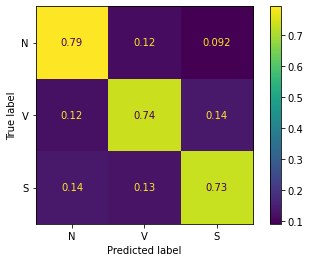

              precision    recall  f1-score   support

           N       0.99      0.79      0.88     49005
           V       0.22      0.74      0.34      2329
           S       0.23      0.73      0.35      1922

    accuracy                           0.79     53256
   macro avg       0.48      0.75      0.52     53256
weighted avg       0.93      0.79      0.84     53256



In [523]:
test_model(train_features_selected, train_target, test_features_selected, test_target, randomForest)